In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from script.data_loading import get_path, study_info
from script.junctions import get_junctions
from script.sequences import Annotator
from script.splice_ai import predict

from definitions import brca1

2024-06-27 14:39:10.501493: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-06-27 14:39:10.501511: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-27 14:39:10.501516: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-27 14:39:10.501545: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-27 14:39:10.501557: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
study_info.head()

,splice,expression,wgs_brass,wgs_pindel,wgs_caveman,total_size
case_id,,,,,,
c1442467-d618-435f-8792-b1a18f696f1a,65c868ba-94ed-43f2-bfd1-814979ee9486.rna_seq.s...,65c868ba-94ed-43f2-bfd1-814979ee9486.rna_seq.a...,c2603e63-fa7d-4ebc-936e-bed52cc932e4.wgs.BRASS...,c2603e63-fa7d-4ebc-936e-bed52cc932e4.wgs.sange...,c2603e63-fa7d-4ebc-936e-bed52cc932e4.wgs.CaVEM...,95698959
9435447e-d65f-408b-863b-6576b1d652dd,7c9a2493-5667-48ec-8998-81e13722b4ab.rna_seq.s...,7c9a2493-5667-48ec-8998-81e13722b4ab.rna_seq.a...,fb4526f0-ee99-46aa-a0df-f125a460b0a3.wgs.BRASS...,fb4526f0-ee99-46aa-a0df-f125a460b0a3.wgs.sange...,fb4526f0-ee99-46aa-a0df-f125a460b0a3.wgs.CaVEM...,87714708
0bf6e772-1aa1-4f54-9a50-c1414e2f22f3,1a3dcc95-64bf-4886-9807-9511b24f30af.rna_seq.s...,1a3dcc95-64bf-4886-9807-9511b24f30af.rna_seq.a...,a30866df-bce8-46ff-8918-bfa7956fdfbc.wgs.BRASS...,a30866df-bce8-46ff-8918-bfa7956fdfbc.wgs.sange...,a30866df-bce8-46ff-8918-bfa7956fdfbc.wgs.CaVEM...,96440606
0adf59c6-581a-475d-a2f4-40aa40060b5b,9d025af7-ba40-4329-9308-d039aaad900b.rna_seq.s...,9d025af7-ba40-4329-9308-d039aaad900b.rna_seq.a...,aa368df9-0840-4619-86d3-46bf56179fee.wgs.BRASS...,aa368df9-0840-4619-86d3-46bf56179fee.wgs.sange...,aa368df9-0840-4619-86d3-46bf56179fee.wgs.CaVEM...,95034341
0045349c-69d9-4306-a403-c9c1fa836644,36125e17-48fd-4eea-874c-ed2e2e218402.rna_seq.s...,36125e17-48fd-4eea-874c-ed2e2e218402.rna_seq.a...,4598a0fe-4bbf-413d-8f9b-db38d4f213d5.wgs.BRASS...,4598a0fe-4bbf-413d-8f9b-db38d4f213d5.wgs.sange...,4598a0fe-4bbf-413d-8f9b-db38d4f213d5.wgs.CaVEM...,90039272


## Find and aggregate absolute junction use

In [26]:
junctions = pd.DataFrame()
for case_id in study_info.index:
    new_j = get_junctions(case_id, brca1).T
    if junctions.empty:
        junctions = new_j
    else:
        junctions = pd.concat([junctions, new_j], ignore_index=True)
junctions = junctions.reindex(sorted(junctions.columns), axis=1).fillna(0)
junctions

intron_donor    43044745 43045803                   43047704           \
intron_acceptor 43044774 43047642 43049120 43051062 43049120 43051062   
0                    0.0      8.0      0.0      0.0      9.0      0.0   
1                    0.0      9.0      0.0      0.0      4.0      0.0   
2                    0.0      9.0      0.0      0.0     18.0      1.0   
3                    0.0     16.0      0.0      0.0     14.0      0.0   
4                    0.0     15.0      0.0      0.0     23.0      0.0   
..                   ...      ...      ...      ...      ...      ...   
95                   0.0     16.0      0.0      0.0     28.0      0.0   
96                   0.0      9.0      0.0      0.0     20.0      0.0   
97                   0.0      4.0      0.0      0.0      5.0      1.0   
98                   0.0     17.0      0.0      0.0     10.0      0.0   
99                   0.0     49.0      0.0      0.0     63.0      0.0   

intron_donor    43049195                             ... 43167251           \
intron_acceptor 43049781 43050061 43051062 43057051  ... 43167733 43169756   
0                    0.0      0.0     15.0      0.0  ...      0.0      0.0   
1                    0.0      0.0      0.0      0.0  ...      0.0      0.0   
2                    0.0      1.0     20.0      0.0  ...      0.0      0.0   
3                    0.0      0.0     21.0      0.0  ...      0.0      0.0   
4                    0.0      0.0     11.0      0.0  ...      0.0      0.0   
..                   ...      ...      ...      ...  ...      ...      ...   
95                   0.0      0.0     14.0      0.0  ...      0.0      0.0   
96                   0.0      0.0     13.0      0.0  ...      0.0      0.0   
97                   0.0      0.0     12.0      0.0  ...      0.0      0.0   
98                   0.0      0.0     12.0      2.0  ...      0.0      0.0   
99                   0.0      0.0     62.0      0.0  ...      0.0      0.0   

intron_donor             43167263          43167850                    \
intron_acceptor 43170125 43169756 43170125 43168169 43169166 43169756   
0                    0.0      0.0      0.0      0.0      0.0      0.0   
1                    0.0      0.0      0.0      0.0      0.0      0.0   
2                    3.0      0.0      2.0      0.0      0.0      0.0   
3                    5.0      3.0      0.0      0.0      0.0      0.0   
4                    1.0      0.0      2.0      0.0      0.0      0.0   
..                   ...      ...      ...      ...      ...      ...   
95                   0.0      0.0      1.0      0.0      0.0      0.0   
96                   1.0      0.0      2.0      0.0      0.0      0.0   
97                   1.0      0.0      0.0      0.0      0.0      0.0   
98                   4.0      0.0      2.0      2.0      0.0      2.0   
99                   0.0      0.0      2.0      0.0      0.0      0.0   

intron_donor             43168269  
intron_acceptor 43170125 43169756  
0                    1.0      0.0  
1                    0.0      0.0  
2                    0.0      0.0  
3                    0.0      0.0  
4                    0.0      0.0  
..                   ...      ...  
95                   0.0      0.0  
96                   0.0      0.0  
97                   0.0      0.0  
98                   5.0      0.0  
99                   1.0      0.0  

[100 rows x 210 columns]

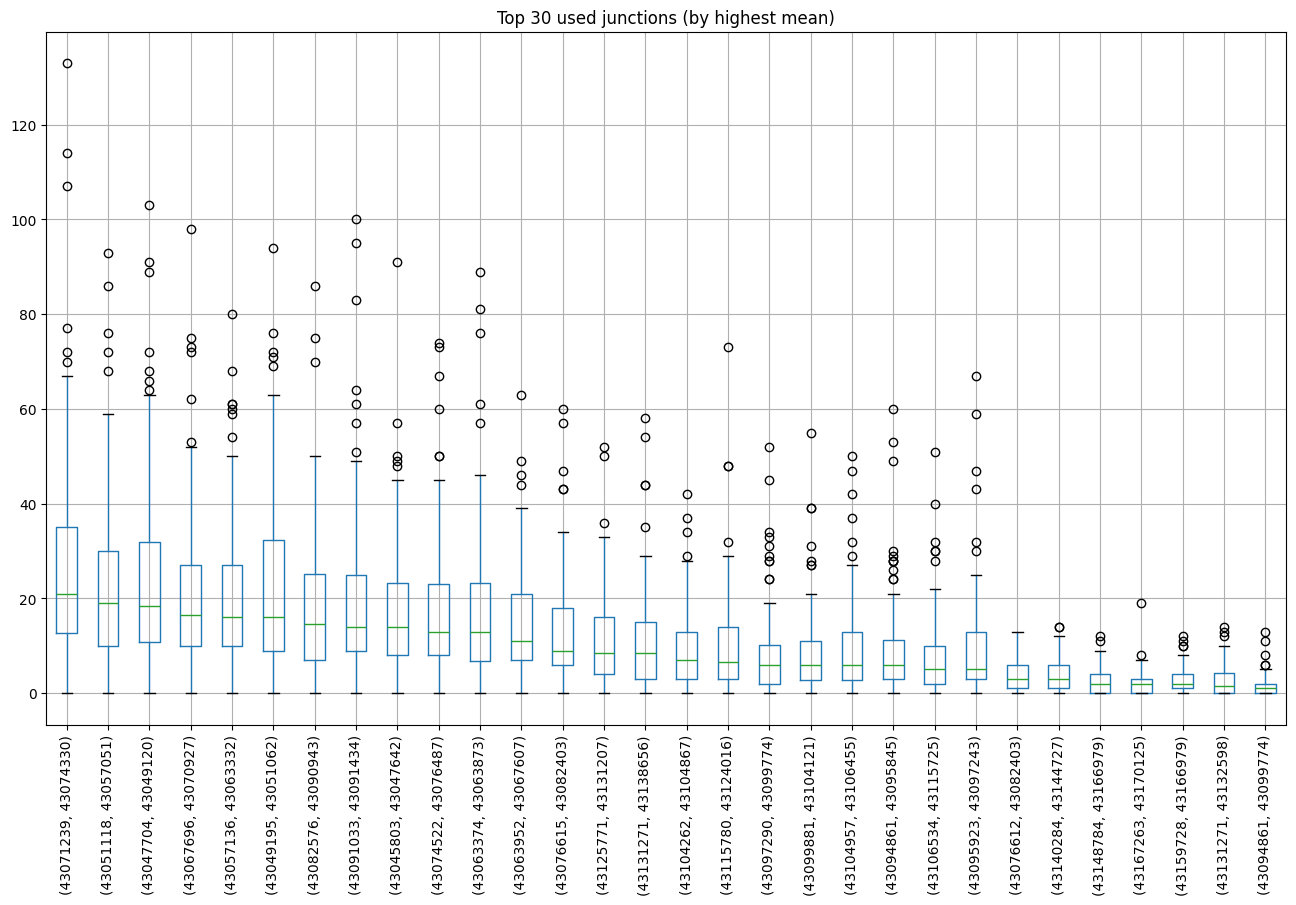

In [4]:
top_n = 30
junctions\
    .reindex(junctions.median().sort_values(ascending=False).index, axis=1)\
    .iloc[:,:top_n]\
    .boxplot(figsize=(16, 9), rot=90)
plt.title(f'Top {top_n} used junctions (by highest mean)')
plt.show()

## Aggregate donor/acceptor probabilities

In [27]:
donor_probs = junctions.T.groupby(level=0).sum().T
acceptor_probs = junctions.T.groupby(level=1).sum().T
# normalize by max usage
# we consider this the "next best" alternative since we can't use actual read
# counts of the genes because those also include exon-only reads that have
# occured
donor_probs = donor_probs.div(donor_probs.max(axis=1), axis=0)
acceptor_probs = acceptor_probs.div(acceptor_probs.max(axis=1), axis=0)

donor_probs

intron_donor,43044745,43045803,43047704,43049195,43049893,43049961,43050191,43050606,43051110,43051118,...,43164764,43164813,43164831,43164839,43167151,43167222,43167251,43167263,43167850,43168269
0,0.0,0.307692,0.346154,0.576923,0.0,0.0,0.000000,0.0,0.0,0.461538,...,0.0,0.076923,0.153846,0.0,0.000000,0.0,0.000000,0.000000,0.038462,0.0
1,0.0,0.500000,0.222222,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.055556,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.346154,0.730769,0.807692,0.0,0.0,0.038462,0.0,0.0,0.653846,...,0.0,0.000000,0.038462,0.0,0.153846,0.0,0.115385,0.076923,0.000000,0.0
3,0.0,0.761905,0.666667,1.000000,0.0,0.0,0.000000,0.0,0.0,0.333333,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.238095,0.142857,0.000000,0.0
4,0.0,0.625000,0.958333,0.458333,0.0,0.0,0.000000,0.0,0.0,0.875000,...,0.0,0.125000,0.083333,0.0,0.041667,0.0,0.041667,0.083333,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.571429,1.000000,0.500000,0.0,0.0,0.000000,0.0,0.0,0.785714,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.035714,0.000000,0.0
96,0.0,0.450000,1.000000,0.650000,0.0,0.0,0.000000,0.0,0.0,0.550000,...,0.0,0.150000,0.000000,0.0,0.100000,0.0,0.050000,0.100000,0.000000,0.0
97,0.0,0.250000,0.375000,0.750000,0.0,0.0,0.000000,0.0,0.0,0.562500,...,0.0,0.000000,0.062500,0.0,0.000000,0.0,0.062500,0.000000,0.000000,0.0
98,0.0,0.653846,0.384615,0.538462,0.0,0.0,0.000000,0.0,0.0,0.307692,...,0.0,0.192308,0.000000,0.0,0.269231,0.0,0.153846,0.076923,0.346154,0.0


## Compare predictions against experimental data

In [28]:
def get_probabilities(case_id: str, variants: str = 'wgs_pindel'):
    ann = Annotator(get_path(study_info.loc[case_id][variants]))
    brca1_seq = ann.get_gene_seq(brca1)
    # predicted probability acceptor/donor
    ppa, ppd = (pd.Series(p) for p in predict(brca1_seq))
    # normalize by max use as well
    ppa /= ppa.max()
    ppd /= ppd.max()
    # shift index into gene
    ppa.index += brca1.bp_start
    ppd.index += brca1.bp_start

    # true probability acceptor/donor
    tpa = acceptor_probs.iloc[participant].reindex(range(ppa.index[0], ppa.index[-1] + 1), fill_value=0)
    tpd = donor_probs.iloc[participant].reindex(range(ppa.index[0], ppa.index[-1] + 1), fill_value=0)

    return pd.concat([ppa, tpa, ppd, tpd], axis=1, keys=['ppa', 'tpa', 'ppd', 'tpd'])

In [29]:
df = evaluate(0)

1/1 [==============================] - 0s 366ms/step


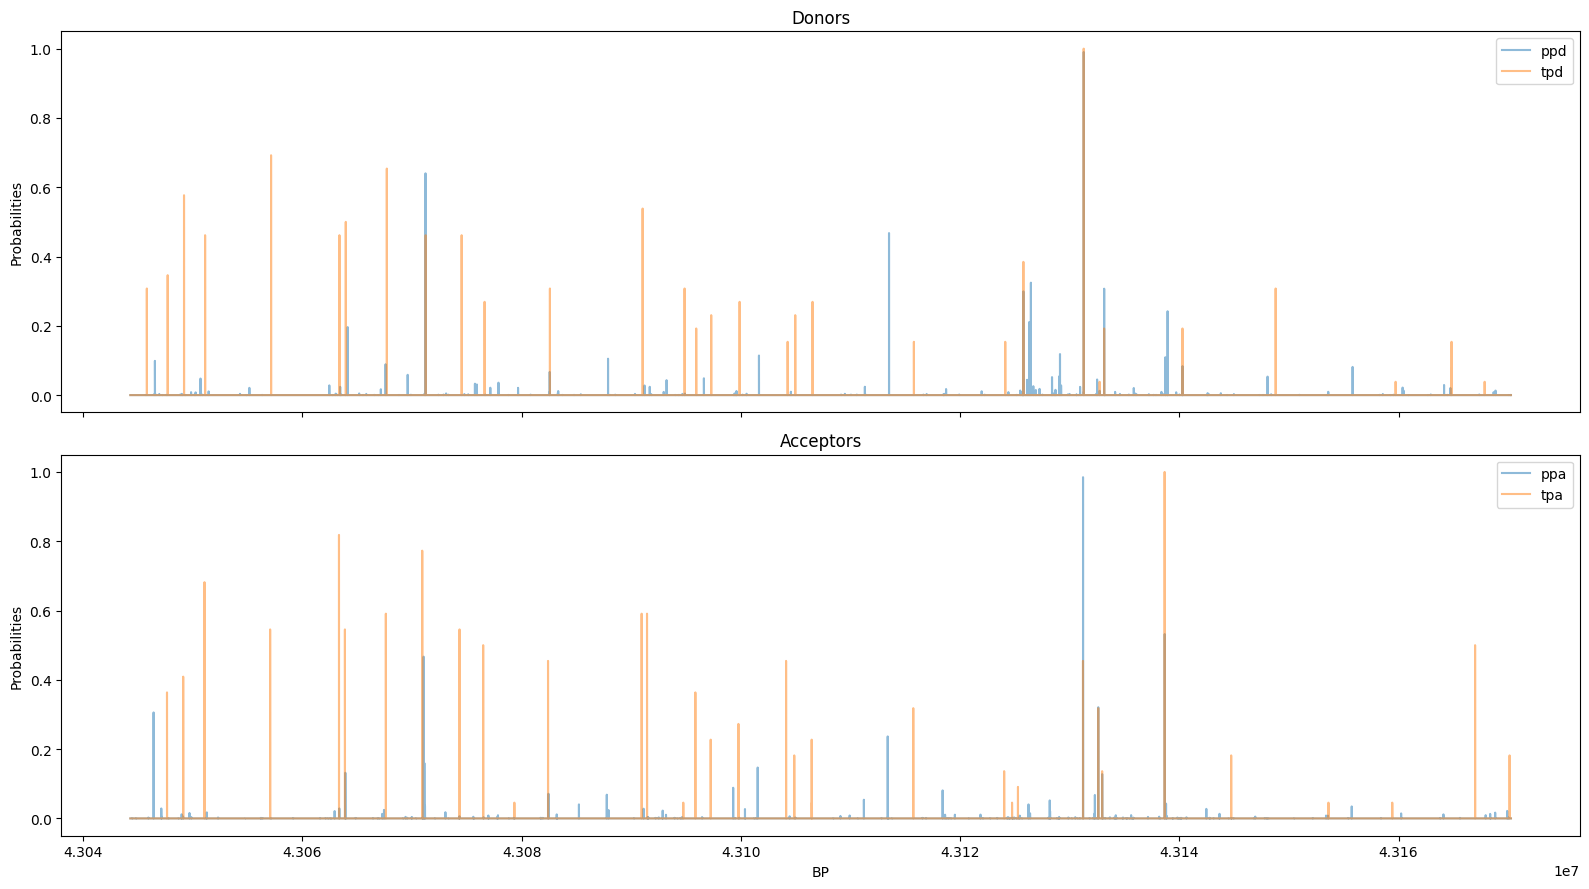

In [30]:
# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 9))

# Plot ppd and tpd on the first subplot
df[['ppd', 'tpd']].plot(ax=ax1, alpha=0.5)
ax1.set_title('Donors')
ax1.set_ylabel('Probabilities')

# Plot ppa and tpa on the second subplot
df[['ppa', 'tpa']].plot(ax=ax2, alpha=0.5)
ax2.set_title('Acceptors')
ax2.set_ylabel('Probabilities')
ax2.set_xlabel('BP')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()